# Library Calls

In [1]:
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 25.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.5/309.5 kB 22.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 10.8 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install imblearn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 6.5 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB,ComplementNB
from sklearn.metrics import accuracy_score,confusion_matrix
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from sklearn.preprocessing import  LabelEncoder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [5]:
df  = pd.read_csv('/kaggle/input/spam-sms-classification-using-nlp/Spam_SMS.csv')

In [6]:
df

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [7]:
df['Class'].unique()

array(['ham', 'spam'], dtype=object)

In [8]:
df.drop_duplicates(keep='first',inplace=True)

In [9]:
df.nunique()

Class         2
Message    5159
dtype: int64

In [10]:
df['Class'].unique()

array(['ham', 'spam'], dtype=object)

In [11]:
df['Class'].value_counts()

Class
ham     4518
spam     641
Name: count, dtype: int64

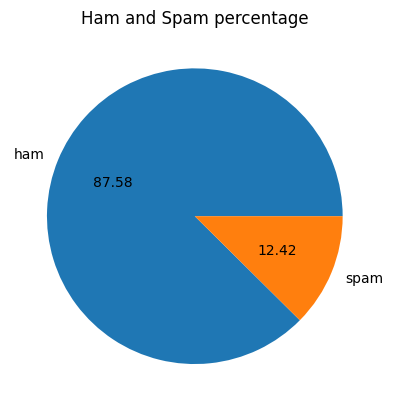

In [12]:
plt.pie(df['Class'].value_counts(),labels = ['ham', 'spam'],autopct='%0.2f')
plt.title("Ham and Spam percentage")
plt.show()

In [13]:
df.dtypes

Class      object
Message    object
dtype: object

# Feature Engineering

In [14]:
df['charecters']=df['Message'].apply(len)

In [15]:
df['word_nums']= df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [16]:
df['sentance_nums'] =df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [17]:
df

,Class,Message,charecters,word_nums,sentance_nums
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...,160,35,4
5570,ham,Will ü b going to esplanade fr home?,36,9,1
5571,ham,"Pity, * was in mood for that. So...any other s...",57,15,2
5572,ham,The guy did some bitching but I acted like i'd...,125,27,1


In [18]:
df[['charecters', 'word_nums', 'sentance_nums']].describe()

,charecters,word_nums,sentance_nums
count,5159.000000,5159.000000,5159.000000
mean,79.130064,18.596821,1.970731
std,58.289063,13.406675,1.455997
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [19]:
label = LabelEncoder()

In [20]:
label.fit_transform(df['Class'])

array([0, 0, 1, ..., 0, 0, 0])

# EDA

In [21]:
fig = px.histogram(data_frame=df,x='charecters',marginal='box',color='Class')
fig.update_layout()
fig.show(renderer='iframe')

In [22]:
df['Class']=label.fit_transform(df['Class'])

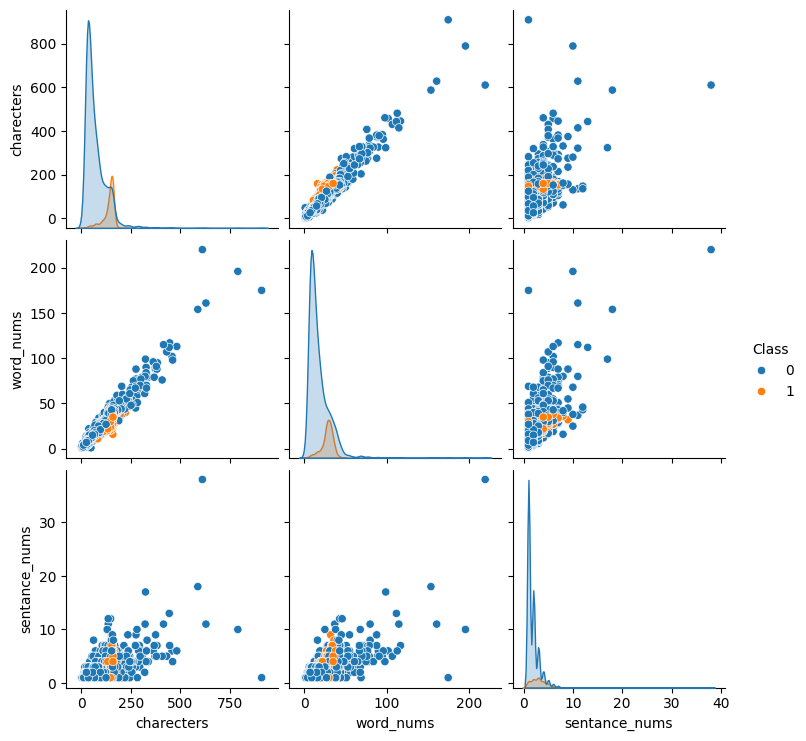

In [23]:
sns.pairplot(df,hue='Class')

In [24]:
df[['charecters', 'word_nums', 'sentance_nums']].corr()

,charecters,word_nums,sentance_nums
charecters,1.000000,0.966000,0.623335
word_nums,0.966000,1.000000,0.679619
sentance_nums,0.623335,0.679619,1.000000


<Axes: >

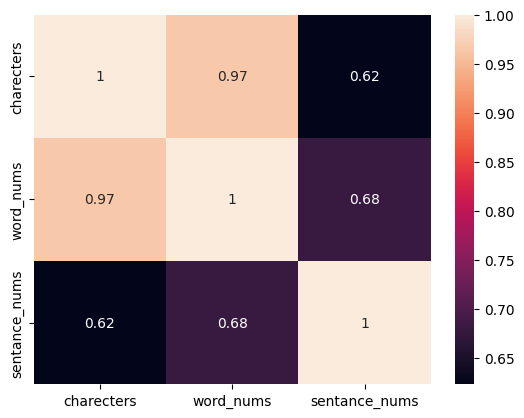

In [25]:
sns.heatmap(df[['charecters', 'word_nums', 'sentance_nums']].corr(),annot=True )

# Data preprocessing

In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
ps = PorterStemmer()

In [28]:
def text_preprocessing(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y =[]

    for i in text:
        if i.isalnum(): # remove special chacrecters
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)


In [29]:
text_preprocessing('This is my  new project in data science@@')

'new project data scienc'

In [30]:
df['tranform_text'] = df['Message'].apply(text_preprocessing)

# Top 30 common word Analysis

In [31]:
from wordcloud import WordCloud

In [32]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

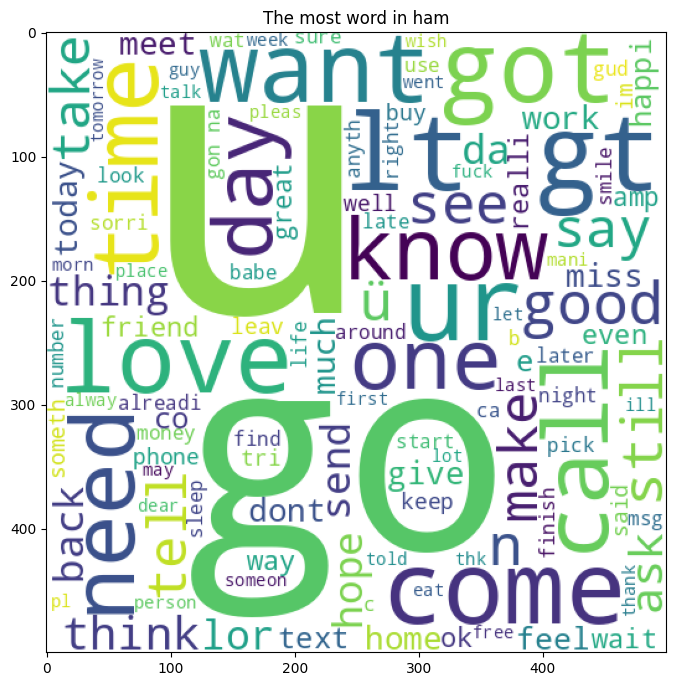

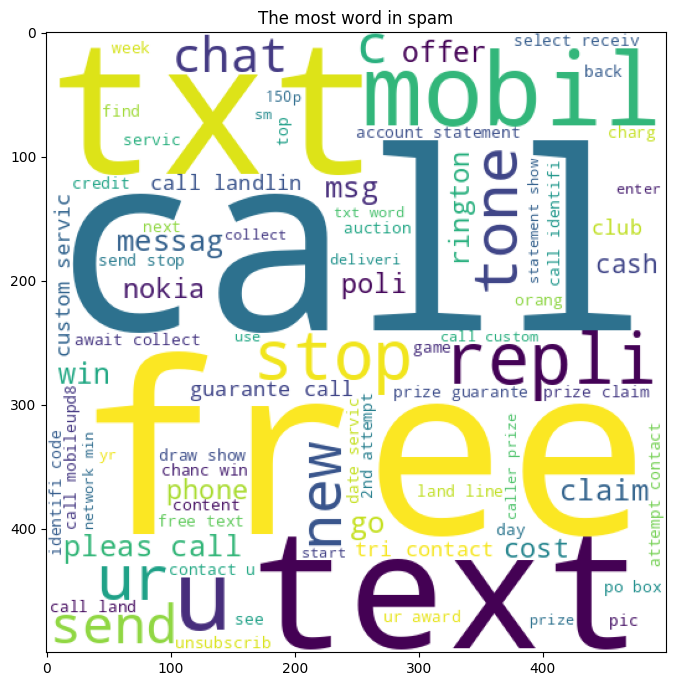

In [33]:
status = ['ham', 'spam']
for i in range(2):
  plt.figure(figsize=(8,12))
  wc = wc.generate(df[df['Class']==i]['tranform_text'].str.cat(sep=""))
  class_name = status[i]
  plt.imshow(wc)
  plt.title(f"The most word in {class_name}")

/tmp/ipykernel_10/2916576765.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_10/2916576765.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




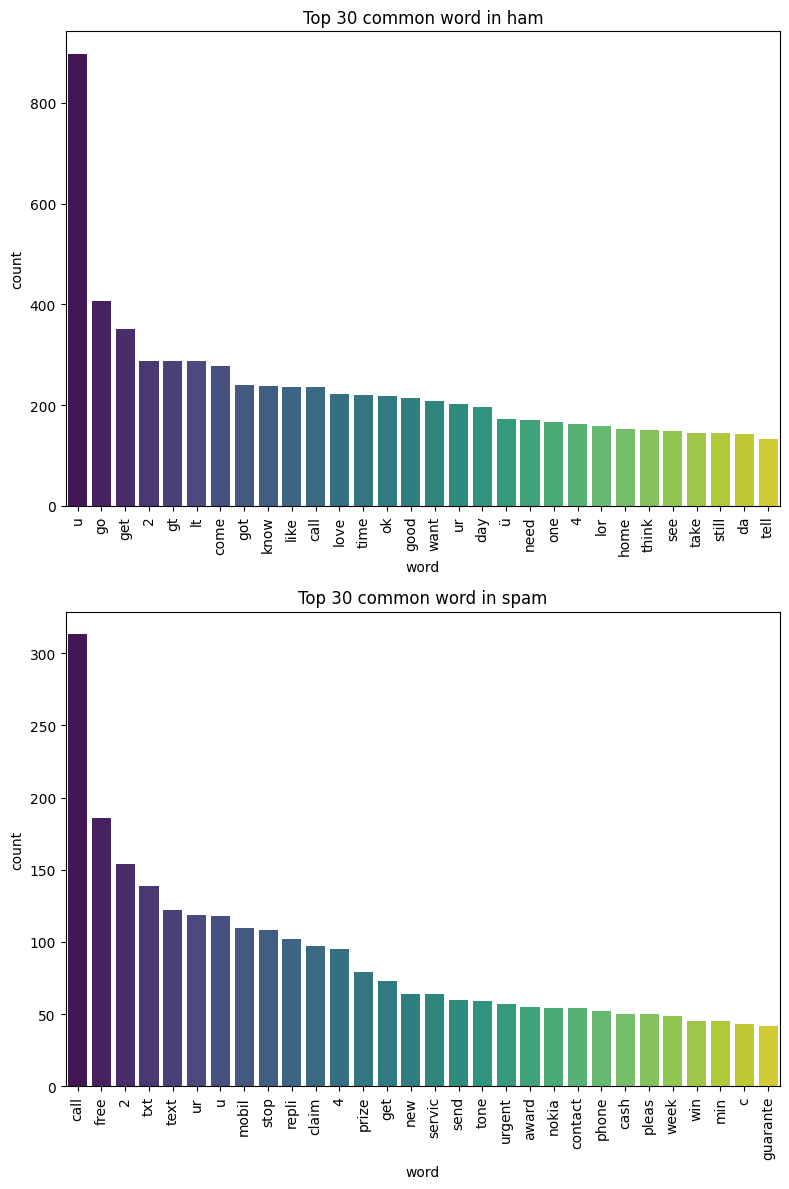

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
%matplotlib inline

status = ['ham', 'spam']

fig, ax = plt.subplots(2, 1, figsize=(8,12))  # Create subplots once outside the loop

for i in range(2):
    senti_corpus = []
    for msg in df[df['Class'] ==i]['tranform_text'].tolist():
        for word in msg.split():
            senti_corpus.append(word)

    # Create DataFrame from word count
    dt = pd.DataFrame(Counter(senti_corpus).most_common(30), columns=['word', 'count'])

    sns.barplot(data=dt, x='word', y='count', palette='viridis', ax=ax[i])  # Fix axis reference
    ax[i].set_title(f"Top 30 common word in {status[i]}")  # Add a title to each plot
    ax[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

plt.tight_layout()  # Adjust layout to fit all subplots
plt.show()  # Show the plot



# Model trainer

In [35]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#cv = CountVectorizer(stop_words='english')
tfidf = TfidfVectorizer(stop_words='english')
import pickle

In [36]:
X = tfidf.fit_transform(df['tranform_text']).toarray()

In [37]:
# save vectorizer
pickle.dump(tfidf,open('vetorizer.pkl','wb'))

In [38]:
X.shape

(5159, 6660)

In [39]:
y = df['Class'].values

In [40]:
# imbalanced dataset
from imblearn.combine import  SMOTETomek
sm = SMOTETomek()
resample_X,resample_y = sm.fit_resample(X,y)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test = train_test_split(resample_X,resample_y,test_size=.20,random_state=42)

In [43]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
models = {
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'ExtraTreesClassifier':ExtraTreesClassifier(),
    'SVC':SVC(kernel='sigmoid', gamma=1.0),
    'RandomForestClassifier':RandomForestClassifier(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'BaggingClassifier' :BaggingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'MultinomialNB':MultinomialNB(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'GaussianNB':GaussianNB(),
    'BernoulliNB':BernoulliNB(),
    'ComplementNB':ComplementNB()
    
}

In [45]:
accuracy = []
matrix = []
for i in range(len(models)):
    model = list(models.values())[i]
    model_name = list(models.keys())[i]
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test,pred)
    print(f"{model_name}: \n accuracy :",acc)
    accuracy.append(acc)
    confo_mat = confusion_matrix(y_test,pred)
    print("cofusion_matrix :\n",confo_mat)
    matrix.append(confo_mat)

LogisticRegression: 
 accuracy : 0.9845132743362832
cofusion_matrix :
 [[876  13]
 [ 15 904]]
DecisionTreeClassifier: 
 accuracy : 0.9773230088495575
cofusion_matrix :
 [[858  31]
 [ 10 909]]
ExtraTreesClassifier: 
 accuracy : 0.9988938053097345
cofusion_matrix :
 [[889   0]
 [  2 917]]
SVC: 
 accuracy : 0.9939159292035398
cofusion_matrix :
 [[881   8]
 [  3 916]]
RandomForestClassifier: 
 accuracy : 0.9933628318584071
cofusion_matrix :
 [[889   0]
 [ 12 907]]
KNeighborsClassifier: 
 accuracy : 0.995575221238938
cofusion_matrix :
 [[885   4]
 [  4 915]]
BaggingClassifier: 
 accuracy : 0.9817477876106194
cofusion_matrix :
 [[866  23]
 [ 10 909]]
AdaBoostClassifier: 
 accuracy : 0.9092920353982301
cofusion_matrix :
 [[869  20]
 [144 775]]
MultinomialNB: 
 accuracy : 0.9834070796460177
cofusion_matrix :
 [[865  24]
 [  6 913]]
GradientBoostingClassifier: 
 accuracy : 0.9695796460176991
cofusion_matrix :
 [[880   9]
 [ 46 873]]
GaussianNB: 
 accuracy : 0.9247787610619469
cofusion_matrix :


In [46]:
dic ={
    'Model':list(models.keys()),
    'Accuracy':accuracy
}
results = pd.DataFrame(dic).sort_values(by='Accuracy',ascending=False)
results


,Model,Accuracy
2,ExtraTreesClassifier,0.998894
5,KNeighborsClassifier,0.995575
11,BernoulliNB,0.994469
3,SVC,0.993916
4,RandomForestClassifier,0.993363
0,LogisticRegression,0.984513
12,ComplementNB,0.983960
8,MultinomialNB,0.983407
6,BaggingClassifier,0.981748
1,DecisionTreeClassifier,0.977323


/tmp/ipykernel_10/2151525568.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Accuracy', ylabel='Model'>

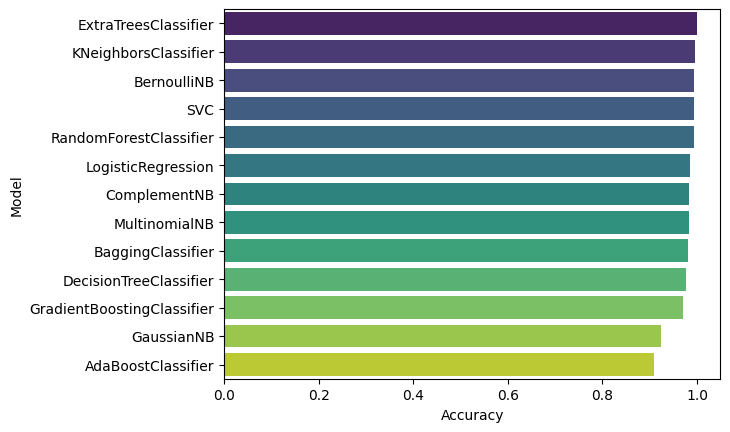

In [47]:
sns.barplot(data=results,x='Accuracy',y='Model',palette='viridis')

In [48]:
# bestmodel 
ExtraTreesClassifier = ExtraTreesClassifier()
ExtraTreesClassifier.fit(X_train,y_train)

ExtraTreesClassifier()

In [49]:
pickle.dump(ExtraTreesClassifier,open('model.pkl','wb'))

In [51]:
ExtraTreesClassifier.predict(X_test)

array([1, 0, 0, ..., 1, 1, 0])

In [52]:
# create  a single prediction 

def make_prediction(text:str):
    transformed_sms = text_preprocessing(text)
    X = tfidf.transform([transformed_sms])
    pred = ExtraTreesClassifier.predict(X)
    return np.array(pred).flatten()[0]

In [53]:
satus  = ['ham','spam']
status[make_prediction('SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6day...')]

'spam'